# 1- Veri Seti Tanımı

In [271]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
data = pd.read_csv('water-treatment.data')
import warnings
warnings.filterwarnings('ignore')
data.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [272]:
data = data.drop(['1'], axis=1)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,39
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


In [273]:
print("Örnek Sayısı:",len(data))
print("Öznitelik Sayısı:",len(data.columns))
data.shape

Örnek Sayısı: 527
Öznitelik Sayısı: 38


(527, 38)

In [274]:
print('Öznitelik türleri:\n', data.dtypes)

Öznitelik türleri:
 2      object
3      object
4     float64
5      object
6      object
7      object
8      object
9      object
10      int64
11    float64
12     object
13      int64
14     object
15     object
16      int64
17    float64
18     object
19     object
20     object
21     object
22     object
23      int64
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
dtype: object


# 2- Verinin ön işlenmesi

In [275]:
def isnumberFloat(x):
    try:
        float(x) 
        return x
    except:
        return np.nan

In [276]:
data = data.applymap(lambda x: isnumberFloat(x))
data = data.apply(pd.to_numeric)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,39
0,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [277]:
data.isnull().sum()/len(data)*100

2      3.415560
3      0.569260
4      0.000000
5      4.364326
6      1.138520
7      0.189753
8      2.087287
9      4.743833
10     0.000000
11     0.000000
12     7.590133
13     0.000000
14     2.087287
15     4.554080
16     0.000000
17     0.000000
18     5.313093
19     1.707780
20     0.379507
21     2.466793
22     4.743833
23     0.000000
24     0.189753
25     4.364326
26     3.415560
27     0.948767
28     3.225806
29     5.313093
30     0.189753
31    11.764706
32     0.759013
33     5.123340
34     7.590133
35     4.933586
36     6.831120
37     4.743833
38     1.518027
39     5.882353
dtype: float64

## Handle with Missing Values

In [278]:
data.mode()
mostFrequent = data.mode().loc[0]
temp = data.fillna(mostFrequent)
temp.head()

,2,3,4,5,6,7,8,9,10,11,...,30,31,32,33,34,35,36,37,38,39
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
1,39024.0,3.0,7.7,133.0,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,36.9,60.7,94.8,85.5,80.8,90.3,79.5,92.1,100.0
2,32229.0,5.0,7.6,133.0,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,36.9,58.2,95.6,85.5,52.9,90.3,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5


In [279]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='most_frequent').fit(data)
data = pd.DataFrame(imputer.transform(data))
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
1,39024.0,3.0,7.7,133.0,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,36.9,60.7,94.8,85.5,80.8,90.3,79.5,92.1,100.0
2,32229.0,5.0,7.6,133.0,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,36.9,58.2,95.6,85.5,52.9,90.3,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5


In [280]:
print("Veri ile ilgili istatistiksel bilgiler:")
data.describe()

Veri ile ilgili istatistiksel bilgiler:


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,36960.886148,2.351328,7.810057,186.282732,406.592030,227.339658,61.503985,4.589374,1478.620493,7.829981,...,1494.635674,38.828653,58.454080,90.694877,83.603795,68.107590,89.101518,78.072106,89.006452,99.140038
std,6673.033177,2.743567,0.246175,61.750924,119.708608,135.832780,12.308208,2.678019,394.898019,0.226925,...,387.559729,13.911690,12.775228,8.733228,8.480339,11.398403,6.790672,8.728821,8.166234,4.329180
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32557.500000,0.900000,7.600000,139.500000,326.500000,170.000000,55.850000,3.200000,1201.000000,7.700000,...,1235.000000,31.150000,50.450000,88.900000,81.800000,63.400000,87.800000,74.250000,87.700000,99.400000
50%,35729.000000,1.500000,7.800000,179.000000,397.000000,196.000000,64.500000,4.500000,1406.000000,7.800000,...,1431.000000,36.900000,59.300000,93.300000,85.500000,70.400000,90.300000,79.500000,90.800000,99.800000
75%,41094.000000,3.000000,8.000000,222.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1691.500000,47.650000,66.800000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [281]:
print('Değişmiş haliyle Öznitelik türleri:\n', data.dtypes)

Değişmiş haliyle Öznitelik türleri:
 0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
dtype: object


## Outlier Detection

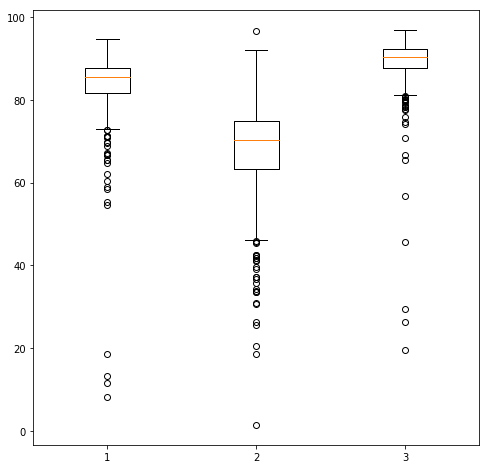

In [282]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=[8,8])
plt.boxplot([data[32],data[33], data[34]])
plt.show()

In [283]:
Q1 = data.quantile(0.25)
print('Q1:\n', Q1)
Q3 = data.quantile(0.75)
print('Q3:\n', Q3)
IQR = Q3 - Q1
print('IQR:\n',IQR)

Q1:
 0     32557.50
1         0.90
2         7.60
3       139.50
4       326.50
5       170.00
6        55.85
7         3.20
8      1201.00
9         7.70
10      140.00
11      184.00
12       54.20
13        3.00
14     1217.00
15        7.70
16       98.00
17      221.50
18       78.00
19       66.70
20        0.20
21     1225.50
22        7.60
23       14.00
24       65.00
25       14.00
26       75.15
27        0.00
28     1235.00
29       31.15
30       50.45
31       88.90
32       81.80
33       63.40
34       87.80
35       74.25
36       87.70
37       99.40
Name: 0.25, dtype: float64
Q3:
 0     41094.00
1         3.00
2         8.00
3       222.00
4       474.50
5       242.00
6        69.60
7         5.50
8      1672.00
9         8.00
10      238.50
11      272.00
12       68.80
13        6.00
14     1713.50
15        7.90
16      147.00
17      325.00
18      106.00
19       79.35
20        0.50
21     1701.00
22        7.80
23       22.00
24      100.00
25       24.00
26 

In [284]:
#outlier detecion with IQR 
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5
5,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644.0,7.8,...,1764.0,36.9,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0
6,41115.0,6.0,7.8,133.0,552.0,262.0,64.1,5.0,1603.0,7.8,...,1703.0,36.9,61.9,93.8,89.1,79.8,90.3,86.2,90.1,99.0
8,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249.0,7.7,...,1338.0,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4


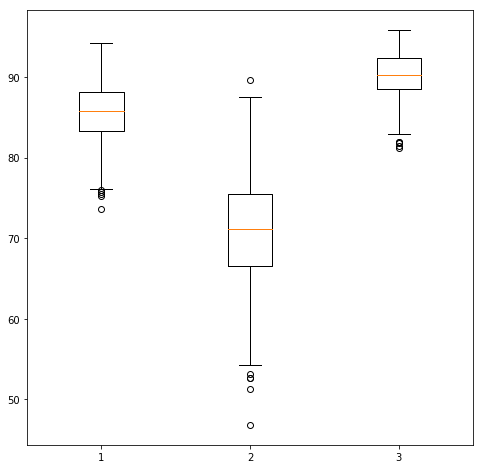

In [285]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=[8,8])
plt.boxplot([data[32],data[33], data[34]])
plt.show()

## Kolonlar arasında bir ilişki var mı? (Feature Selection)

In [286]:
import seaborn as sns
correlations = data.corr()

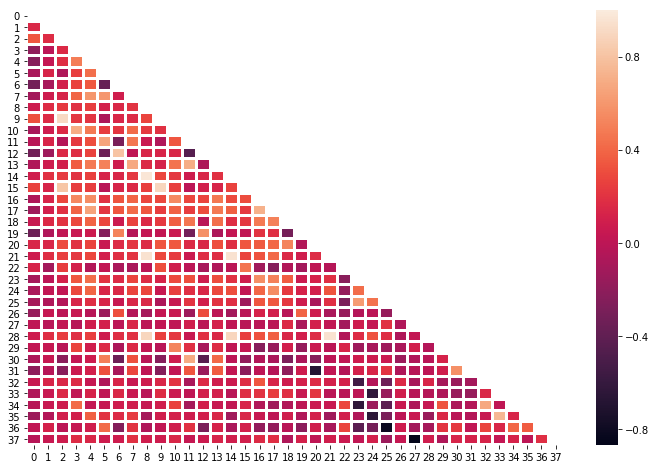

In [287]:
plt.subplots(figsize=(12,8))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations, xticklabels=data.columns, yticklabels=data.columns, mask=mask, linewidths=2)
plt.show()

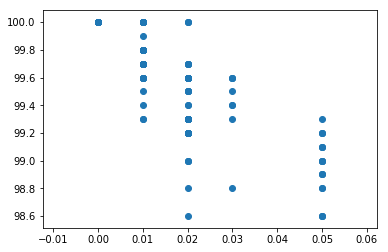

In [288]:
plt.scatter(data[27], data[37])

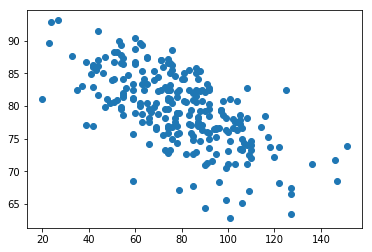

In [289]:
plt.scatter(data[24], data[35])

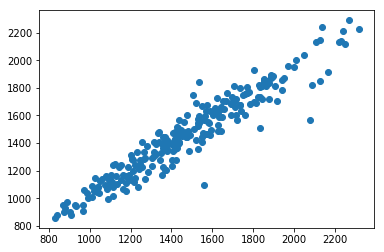

In [290]:
plt.scatter(data[21], data[28])

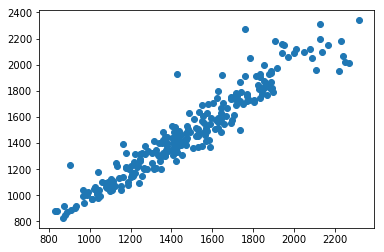

In [291]:
plt.scatter(data[21], data[14])

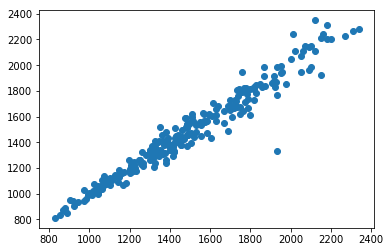

In [292]:
plt.scatter(data[14], data[8])

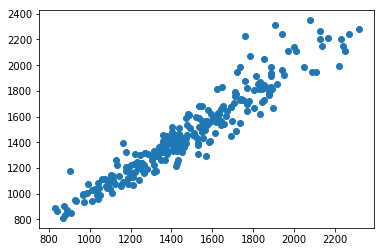

In [293]:
plt.scatter(data[21], data[8])

In [294]:
#birbiriyle ilişkli olan kolonlardan bir tanesi silinir.
data = data.drop([24,21,28,14], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,35,36,37
0,44101.0,1.5,7.8,133.0,407.0,166.0,66.3,4.5,2110.0,7.9,...,0.02,36.9,58.8,95.5,85.5,70.0,90.3,79.4,87.3,99.6
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,0.02,36.9,62.7,95.6,85.5,71.0,92.1,78.2,87.5,99.5
5,38572.0,3.0,7.8,202.0,372.0,186.0,68.8,4.5,1644.0,7.8,...,0.00,36.9,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100.0
6,41115.0,6.0,7.8,133.0,552.0,262.0,64.1,5.0,1603.0,7.8,...,0.05,36.9,61.9,93.8,89.1,79.8,90.3,86.2,90.1,99.0
8,29156.0,2.5,7.7,206.0,451.0,194.0,69.1,4.5,1249.0,7.7,...,0.03,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4


## Feature Extraction

In [295]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit(data).transform(data)
pca = PCA(n_components=2)
pca.fit(X_normalized)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [296]:
data_2d = pca.transform(X_normalized)

In [297]:
data.index

Int64Index([  0,   4,   5,   6,   8,  19,  21,  22,  23,  24,
            ...
            515, 516, 517, 518, 519, 520, 523, 524, 525, 526],
           dtype='int64', length=255)

In [298]:
data_2d = pd.DataFrame(data_2d)
data_2d.index = data.index
data_2d.columns = ['PC1','PC2']
data_2d.head()

,PC1,PC2
0,0.035940,0.045315
4,0.981939,-0.790905
5,2.256443,-0.676873
6,3.624268,-1.535921
8,0.179718,-0.185143


# K_means

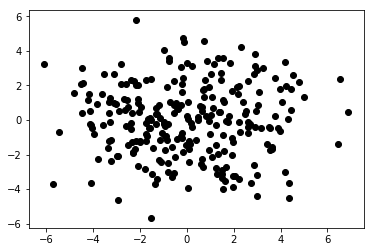

In [241]:
import pylab as pl
pl.scatter(data_2d.iloc[:,0],data_2d.iloc[:,1],c='black')
pl.show()

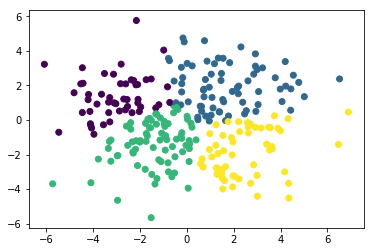

In [314]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering

import pylab as pl

kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(data_2d)

pl.figure('K-means with 3 clusters')

pl.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans.labels_)


plt.show()

In [248]:
len(data_2d)

255

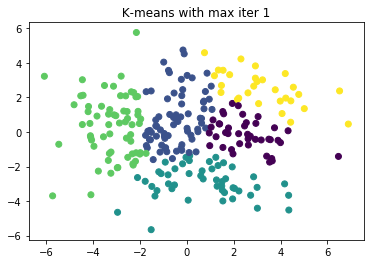

In [322]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=42)
kmeans_iter1.fit(data_2d)



plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_iter1.labels_)
plt.title( ' K-means with max iter 1 ')

plt.show()

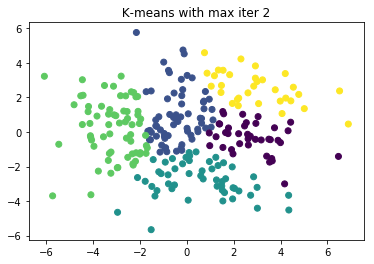

In [323]:
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=42)
kmeans_iter2.fit(data_2d)

plt.figure('K-means with 5 clusters')

plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_iter2.labels_)
plt.title( ' K-means with max iter 2 ')

plt.show()

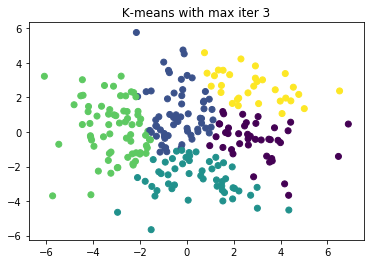

In [324]:
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=42)
kmeans_iter3.fit(data_2d)

plt.figure('K-means with 5 clusters')

plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_iter3.labels_)
plt.title( ' K-means with max iter 3 ')

plt.show()

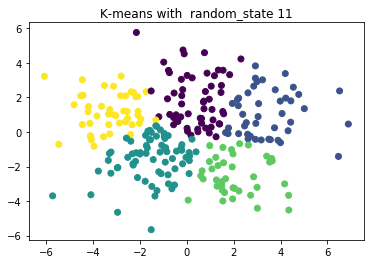

In [326]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init1 .fit(data_2d)
plt.figure('K-means with 5 clusters')
plt.title('K-means with  random_state 11')
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_rnd_init1 .labels_)
plt.show()

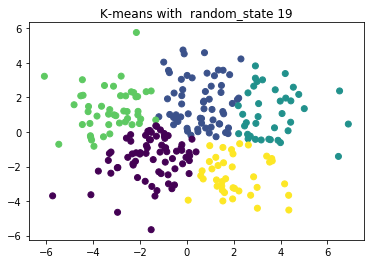

In [327]:
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,algorithm="full", random_state=19)
kmeans_rnd_init2 .fit(data_2d)
plt.figure('K-means with 5 clusters')
plt.title('K-means with  random_state 19')
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=kmeans_rnd_init2 .labels_)
plt.show()

In [328]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [329]:
silhouette_score(data_2d,kmeans_rnd_init2 .labels_)

0.3503165400929558

In [343]:
range_n_clusters = list (range(2,10))

In [344]:
for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_2d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_2d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.36507214592786325
For n_clusters = 3 The average silhouette_score is : 0.3641426381349332
For n_clusters = 4 The average silhouette_score is : 0.34122850993583276
For n_clusters = 5 The average silhouette_score is : 0.3482102139036135
For n_clusters = 6 The average silhouette_score is : 0.36284236487847216
For n_clusters = 7 The average silhouette_score is : 0.36327674574254926
For n_clusters = 8 The average silhouette_score is : 0.34316569604710623
For n_clusters = 9 The average silhouette_score is : 0.35097285189785066


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

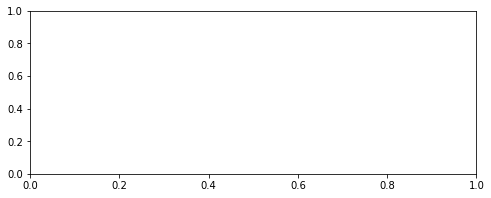

In [348]:
plt.figure(figsize=(8,3))
plt.plot(range(8,10),silhouette_score[],"bo-")

plt.title('K-means with  random_state 11')

plt.show()

# Fit and Predict

In [255]:
from sklearn.cluster import KMeans

In [256]:
y_pred = kmeans.fit_predict(data_2d)

In [257]:
y_pred

array([2, 3, 3, 3, 2, 3, 2, 3, 1, 1, 3, 2, 1, 1, 2, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 3, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 2, 2, 2, 0, 1, 2, 3, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 2, 2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3, 2, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1,
       2, 0, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 1, 1, 0, 3, 3, 2,
       2, 2, 2, 3, 1, 3, 3, 1, 3, 1, 1, 2, 2, 1, 3, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 0, 2, 0, 0, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2])

In [258]:
y_pred is kmeans.labels_

True

In [259]:
kmeans.cluster_centers_

array([[-3.01996768,  1.3705677 ],
       [ 1.72033094,  1.93514217],
       [-1.37492426, -1.37314613],
       [ 2.51395506, -1.84037181]])

In [260]:
kmeans.labels_

array([2, 3, 3, 3, 2, 3, 2, 3, 1, 1, 3, 2, 1, 1, 2, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 3, 3, 3, 2, 3, 3,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 2, 2, 2, 0, 1, 2, 3, 0, 1, 2, 1,
       1, 0, 0, 1, 0, 2, 2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3, 2, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 1,
       2, 0, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 1, 1, 0, 3, 3, 2,
       2, 2, 2, 3, 1, 3, 3, 1, 3, 1, 1, 2, 2, 1, 3, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 0, 2, 0, 0, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2])

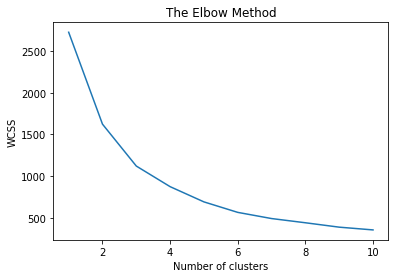

In [262]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# -------------------------

In [208]:
from sklearn.preprocessing import normalize
data_2d['mean'] = pd.Series(data.mean(axis=1), index=data_2d.index)
mean_max =data_2d['mean'].max()
mean_min = data_2d['mean'].min()

In [209]:
mean_scaled = (data_2d['mean']-mean_min) / mean_max
data_2d['mean_scaled'] = pd.Series(mean_scaled,index=data_2d.index)
data_2d.head()

,PC1,PC2,mean,mean_scaled
0,0.035940,0.045315,1436.465294,0.317112
4,0.981939,-0.790905,1233.559412,0.197160
5,2.256443,-0.676873,1269.508824,0.218412
6,3.624268,-1.535921,1350.625000,0.266366
8,0.179718,-0.185143,977.942059,0.046047


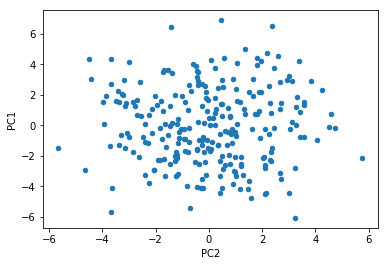

In [210]:
data_2d.plot(kind='scatter', x='PC2', y='PC1')